This is a tutorial for our figure generator. We show how to create a figure based on grid modules. 

Additional examples can be found in the `tests/` folder.

The following code lines are only needed to show the figure result in jupyter. For that we have one additional dependency: pdf2image.

In [1]:
from jupyter_util import displaypdf, loadhtml
from IPython.core.display import HTML

First, we need to import the figure generator.
"util" provides functionality for cropping, tonemapping, error metrics, etc.

In [2]:
import figuregen
from figuregen import util
import numpy as np

Then, we need some image data. Here we use solid color images. Typically, the user has their own image data, that they can load and process. 

In [3]:
# define some colors (r,g,b)
yellow=[232, 181, 88]
l_blue=[94, 163, 188]
blue=[82, 110, 186]
orange=[186, 98, 82]

# generate test images
img_blue = np.tile([x / 255 for x in l_blue], (32, 64, 1))
img_yellow = np.tile([x / 255 for x in yellow], (32, 64, 1))
img_orange = np.tile([x / 255 for x in orange], (32, 64, 1))

# load the two images
images = [
    img_blue,
    img_yellow,
    img_orange
]

In the following we create a grid with two rows and three columns and fill it with the images.

In [4]:
n_rows = 2
n_cols = 3
c_grid = figuregen.Grid(num_rows=n_rows, num_cols=n_cols)

# fill grid with image data
for row in range(n_rows):
    for col in range(n_cols):
        c_grid.get_element(row,col).set_image(images[row])

This is the first module for our figure.
To generate a figure the user provides a list of modules (here one grid), the figure width, and the output filename. The filename extension defines which backend will be used. The figure generator offers three backends: LaTeX (.pdf), HTML (.html) and PPTX (.pptx). In this tutorial we use LaTeX. 

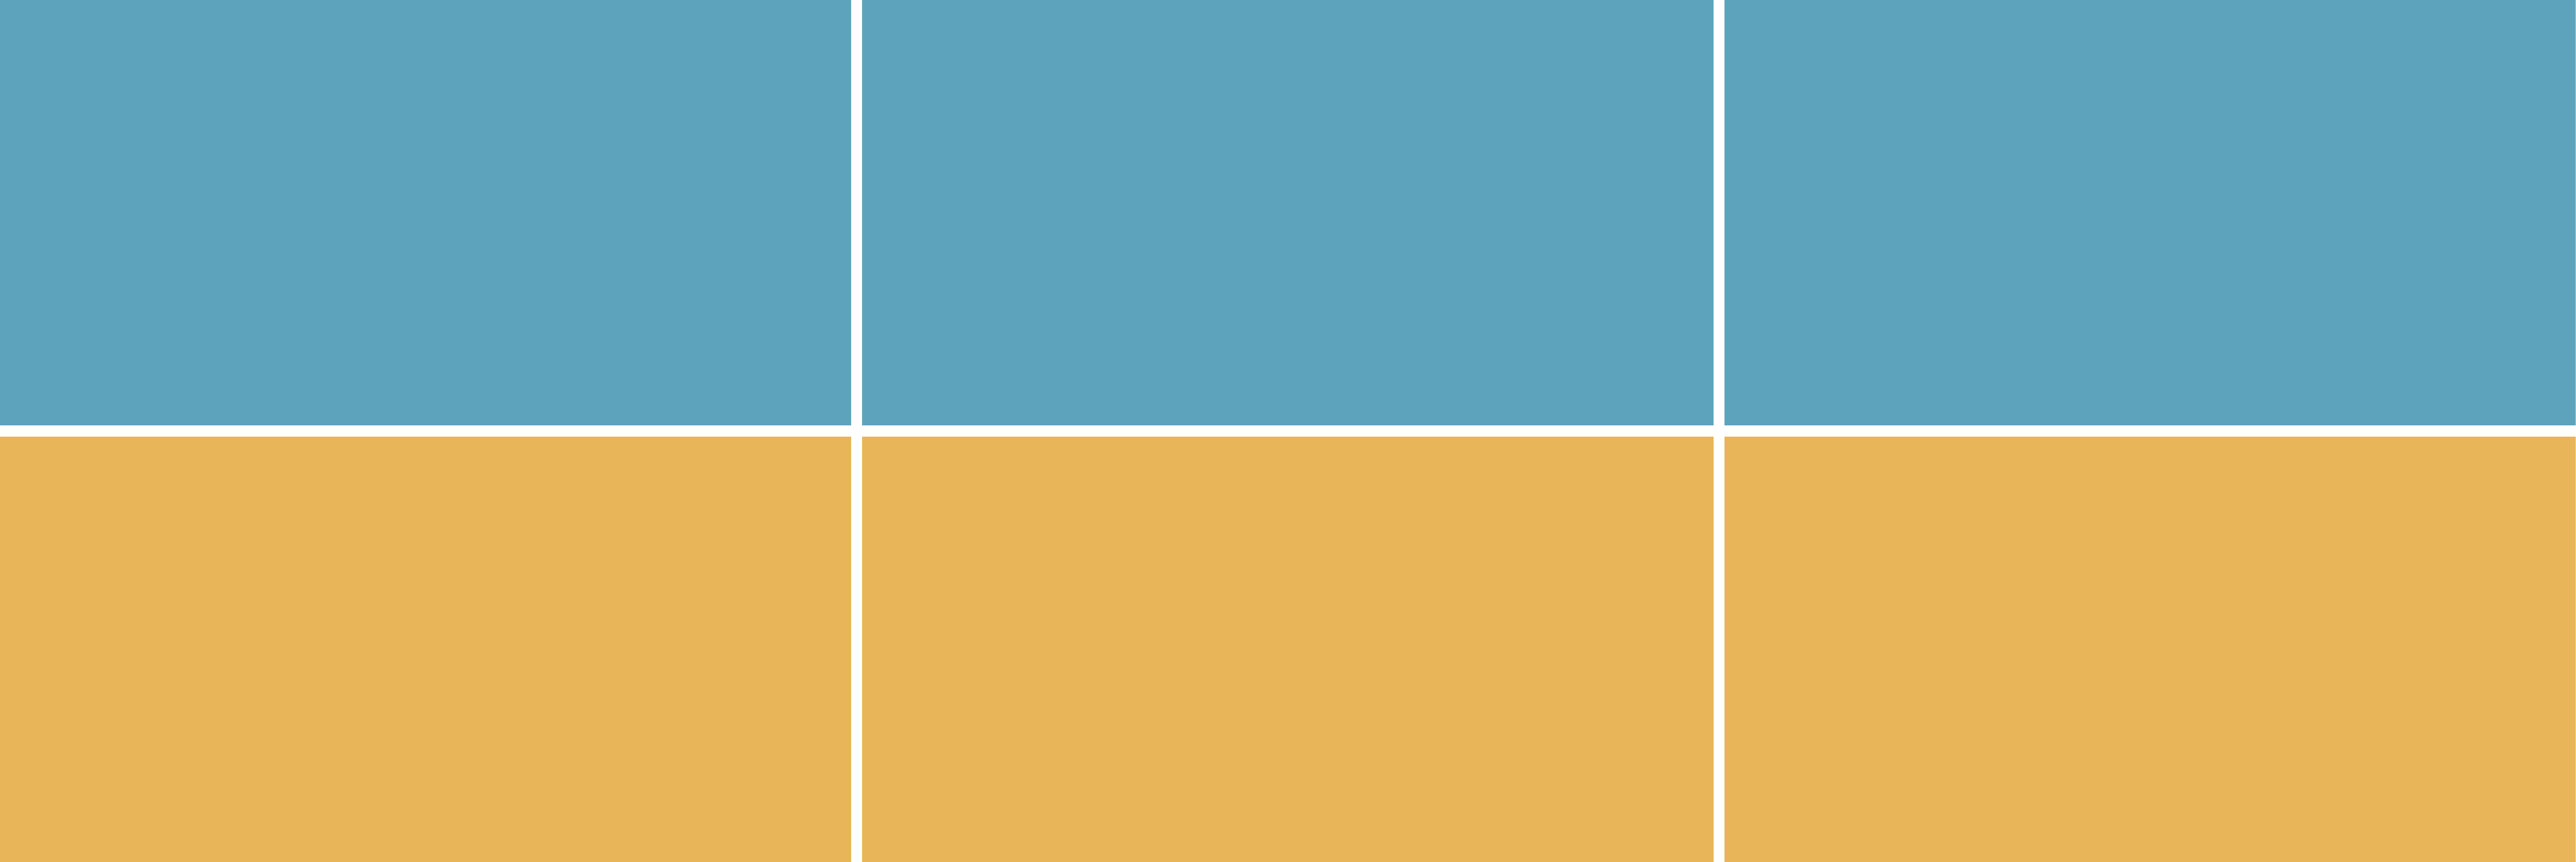

In [5]:
# generate figure
figuregen.horizontal_figure([c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

With the following two code lines, you can generate a HTML file and display it in jupyter:


figuregen.horizontal_figure(\[c_grid\], width_cm=18., filename='horizontal_figure.html')

display(HTML(data=loadhtml('horizontal_figure.html')))


We do not do that here, because we would need to add the generated image folders in our repository, so that the images can be shown.

Let's add another grid to the previous one!

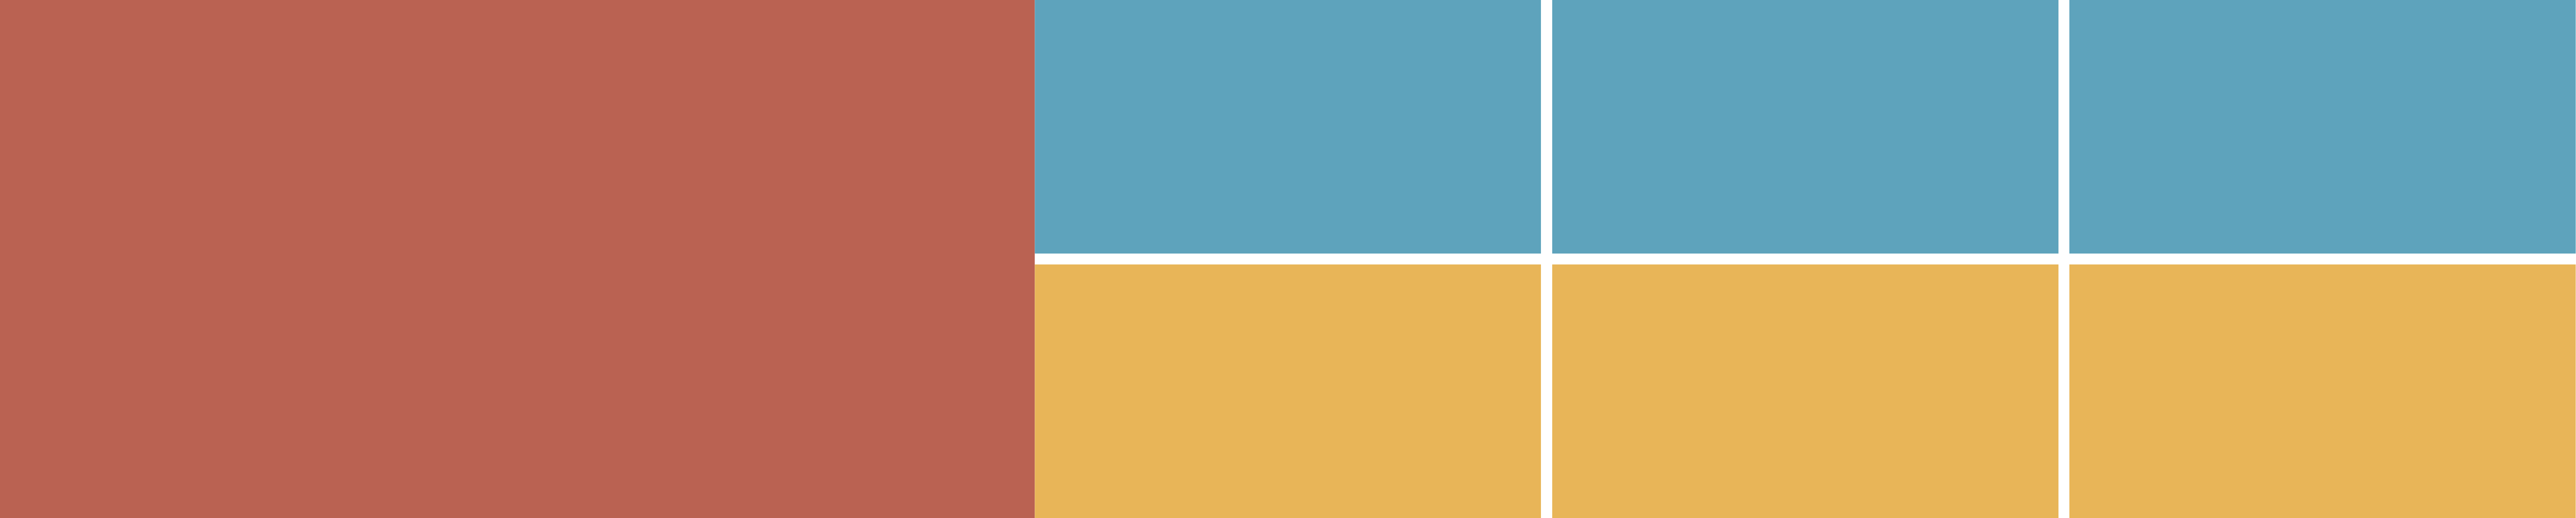

In [6]:
# create a second grid (1-by-1)
ref_grid = figuregen.Grid(num_rows=1, num_cols=1)
ref_grid.get_element(0,0).set_image(img_orange)

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

Let's add some paddings!

Layout: 
To make sure, that the user does not need to set every little layout-property there exist, we provide a default layout ('figuregenerator/generator/default_layouts.py'). Every value not set, will get the default value within that file. Default values for field_sizes concerning titles/captions are defined in 'figuregenerator/generator/figuregen.py'.

Units:
Most units are in mm (millimeter, type:float). Some are in points (concerning linewidths and fontsizes) or pixels (concerning images).

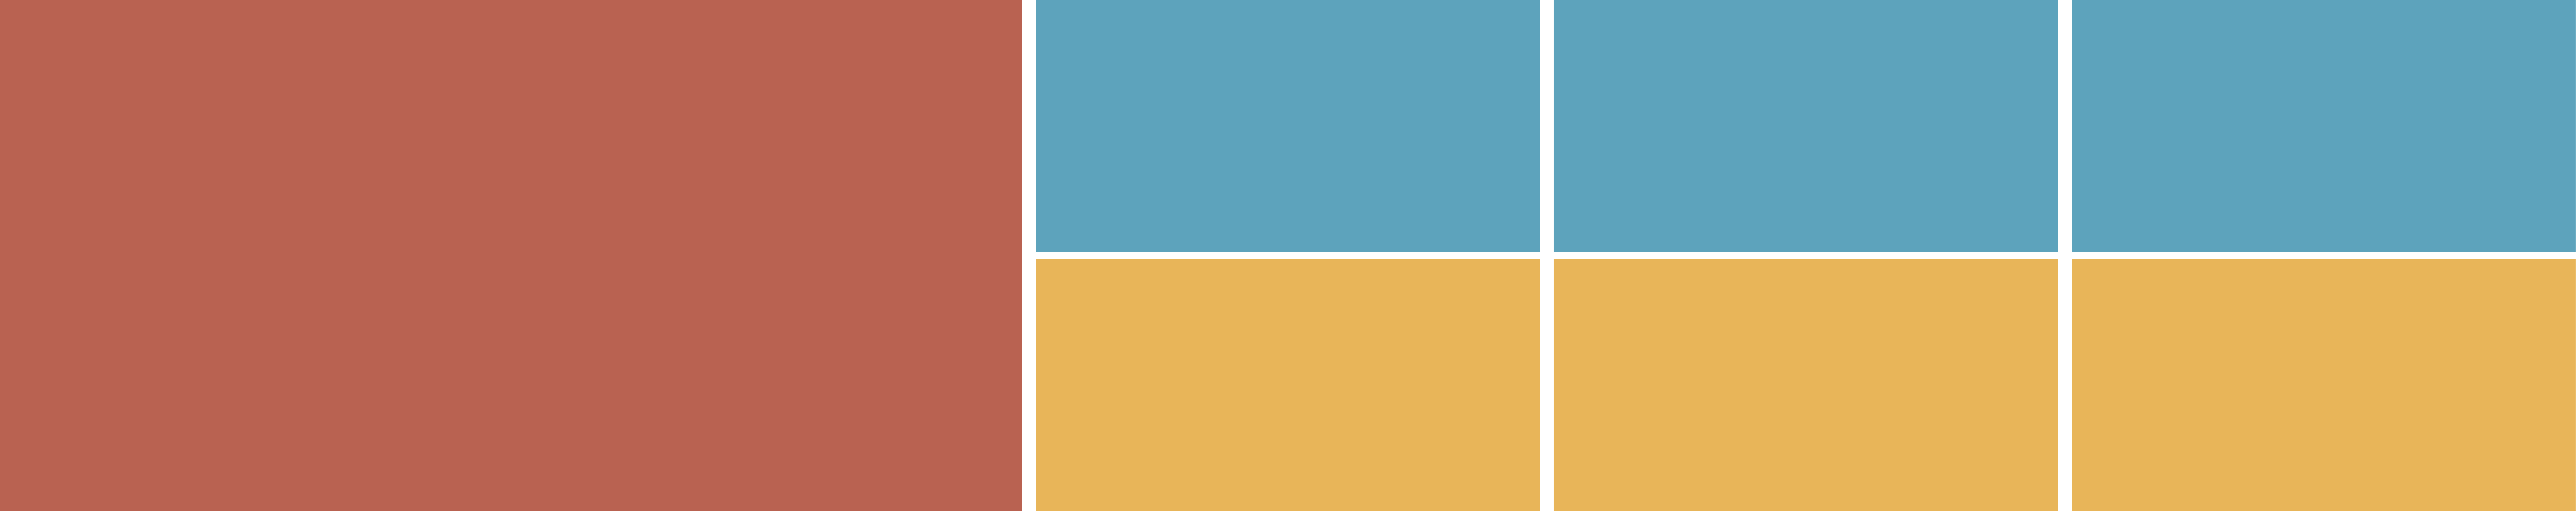

In [7]:

# Specify the paddings for rows and columns (unit: mm), before we had default values
c_lay = c_grid.get_layout()
c_lay.set_padding(row=0.5, column=1.0)

# To get a padding between those grids: set padding right for the left grid
ref_lay = ref_grid.get_layout()
ref_lay.set_padding(right=1.0)

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

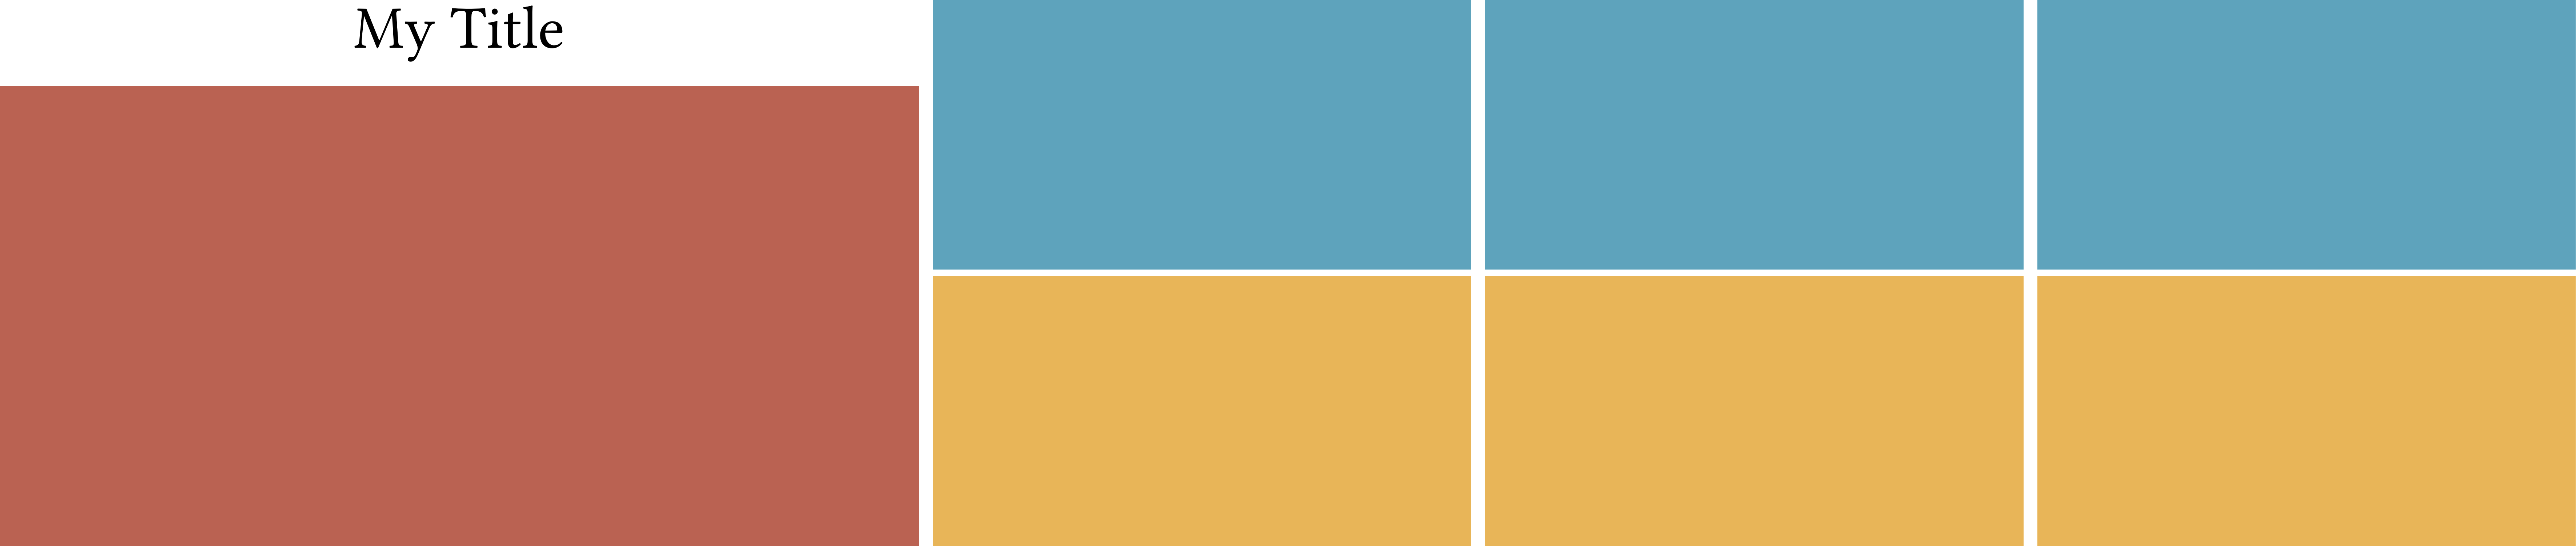

In [8]:
# add a title on top of the reference
ref_grid.set_title('top', 'My Title')
# Specify field_size of the title. 'field_size' is either height oder width, depending on the position (in case for 'top' it is the height).
ref_lay.set_title('top', field_size_mm=5., offset_mm=1., fontsize=12)

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")


Note (WIP): The text color in html should be per default black like in other backends (if not specified otherwise). This is not the case, yet, as the text colors defaults are those of Jupyter/Browser/etc. 

Let's align the top edge of the right hand images with the left hand one.

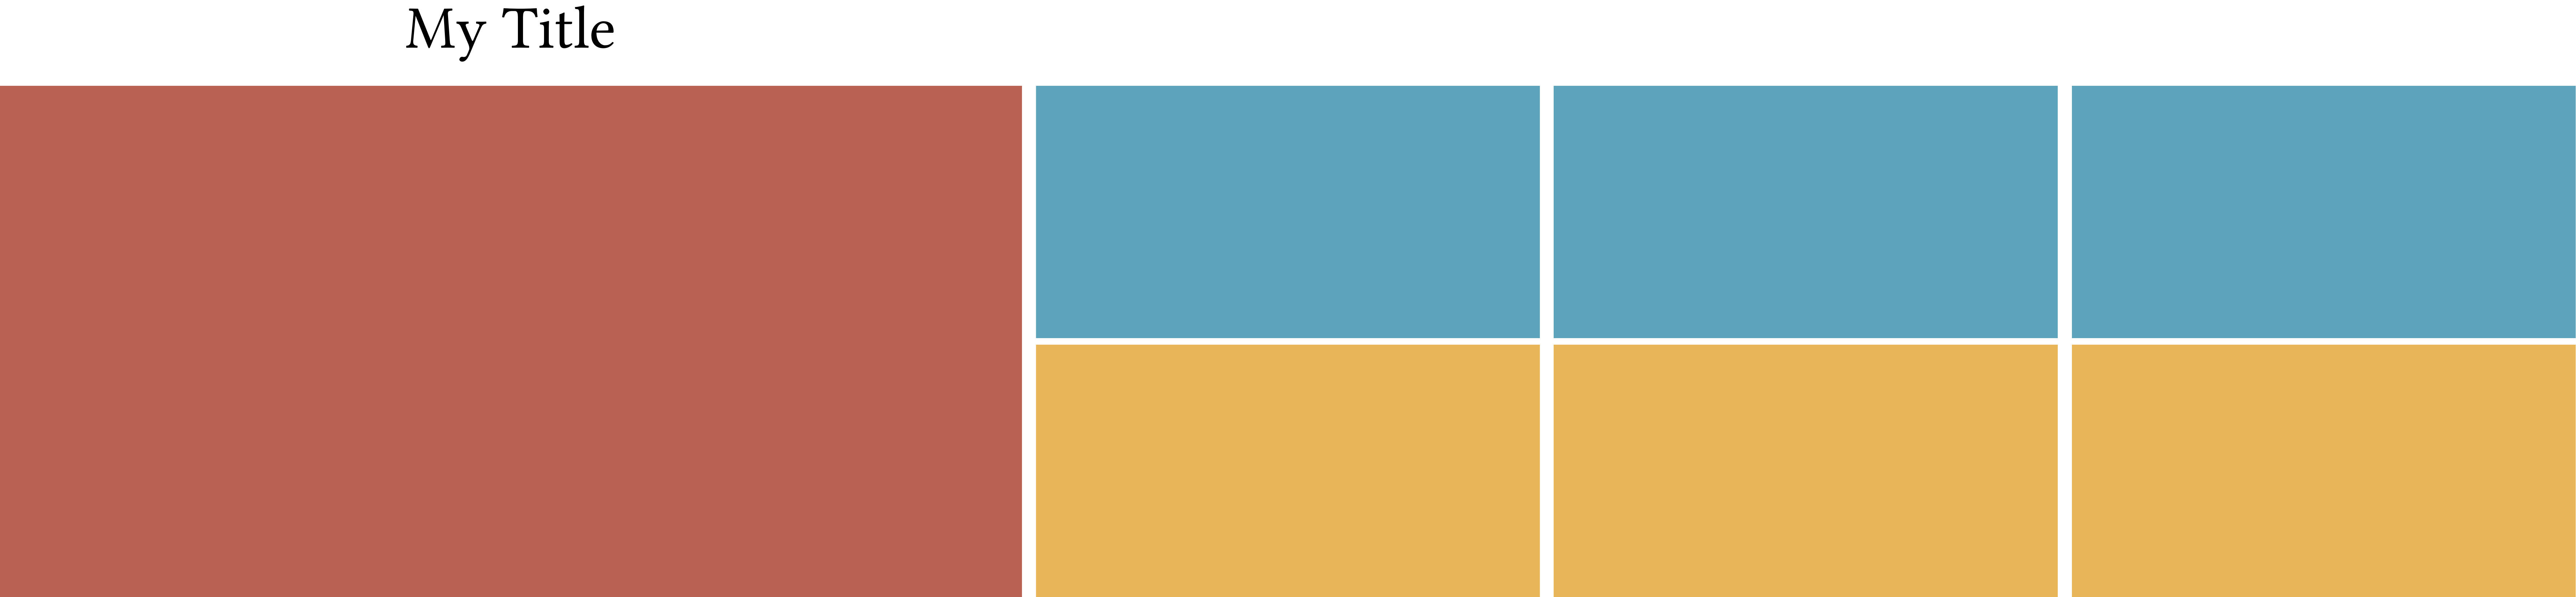

In [9]:
c_lay.set_padding(top=6.) # = field_size (5.0) + offset (1.0) of reference title

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

We can set markers (rectangles) on top of an image. In rendering, it is common practice to mark crops in a scene. 

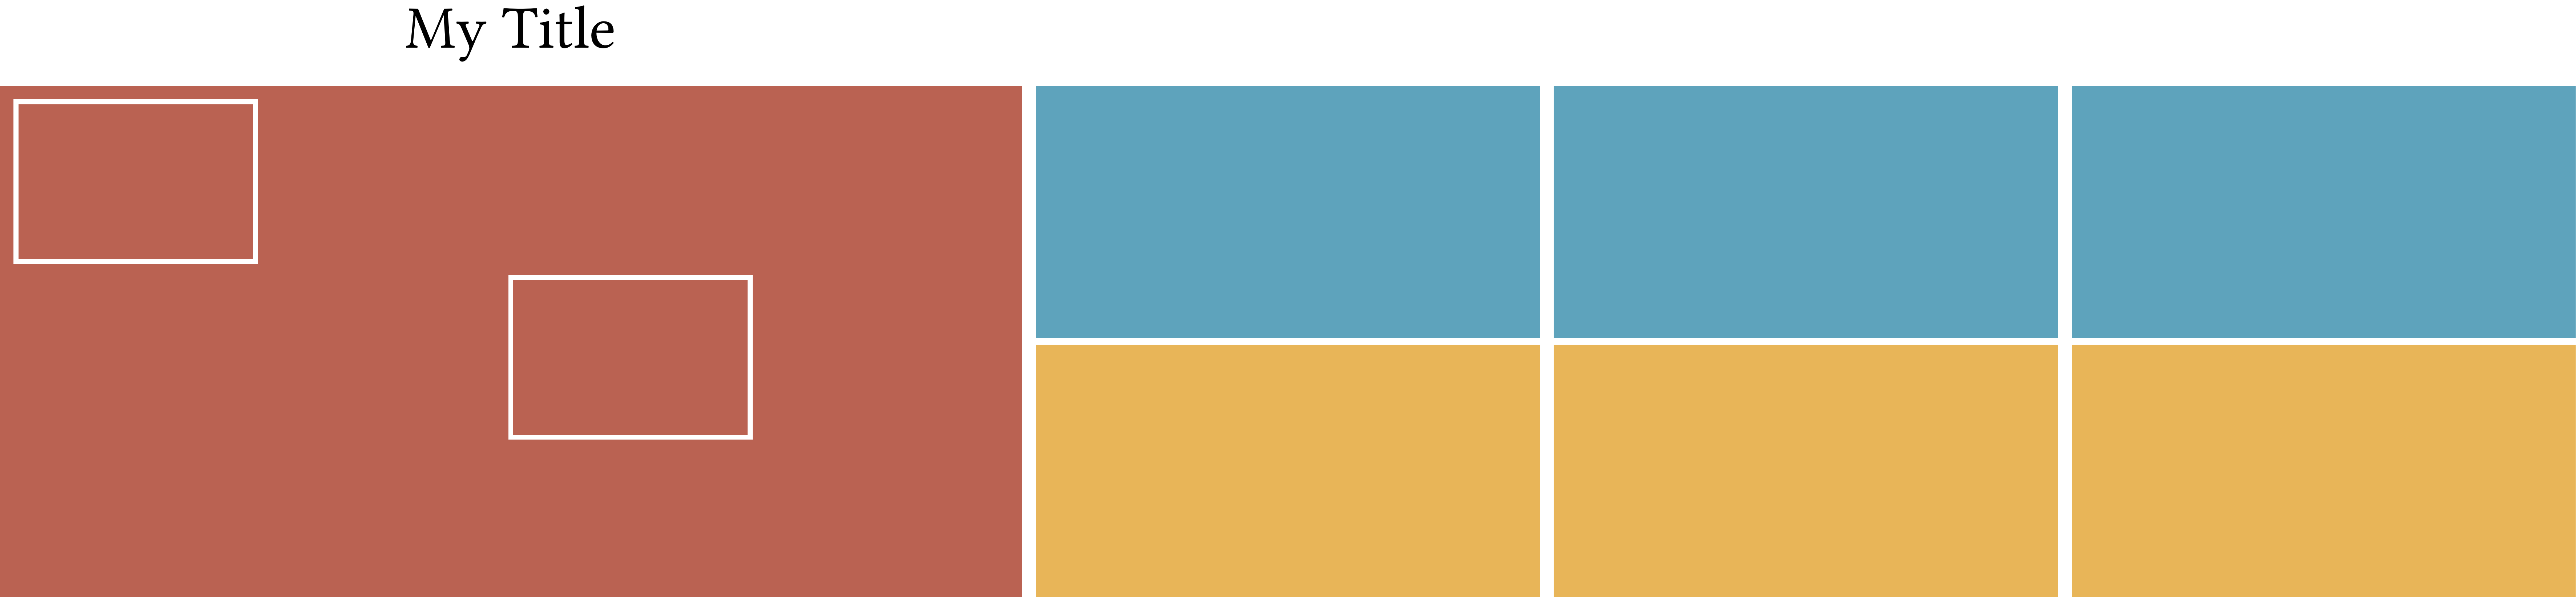

In [10]:
crops = [
    util.image.Cropbox(left=32, top=12, height=10, width=15),
    util.image.Cropbox(left=1, top=1, height=10, width=15)
]

ref_e = ref_grid.get_element(0,0)

# set markers
for crop in crops:
    ref_e.set_marker(pos=crop.get_marker_pos(), size=crop.get_marker_size(), color=[255,255,255], linewidth_pt=1.0, is_dashed=False)

# generate figure with LaTeX
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

Each element can have it's own caption, that is, a text below the image. For alignment reason, if one image of a grid has a caption, all other images of the same grid get an empty caption-placeholder.

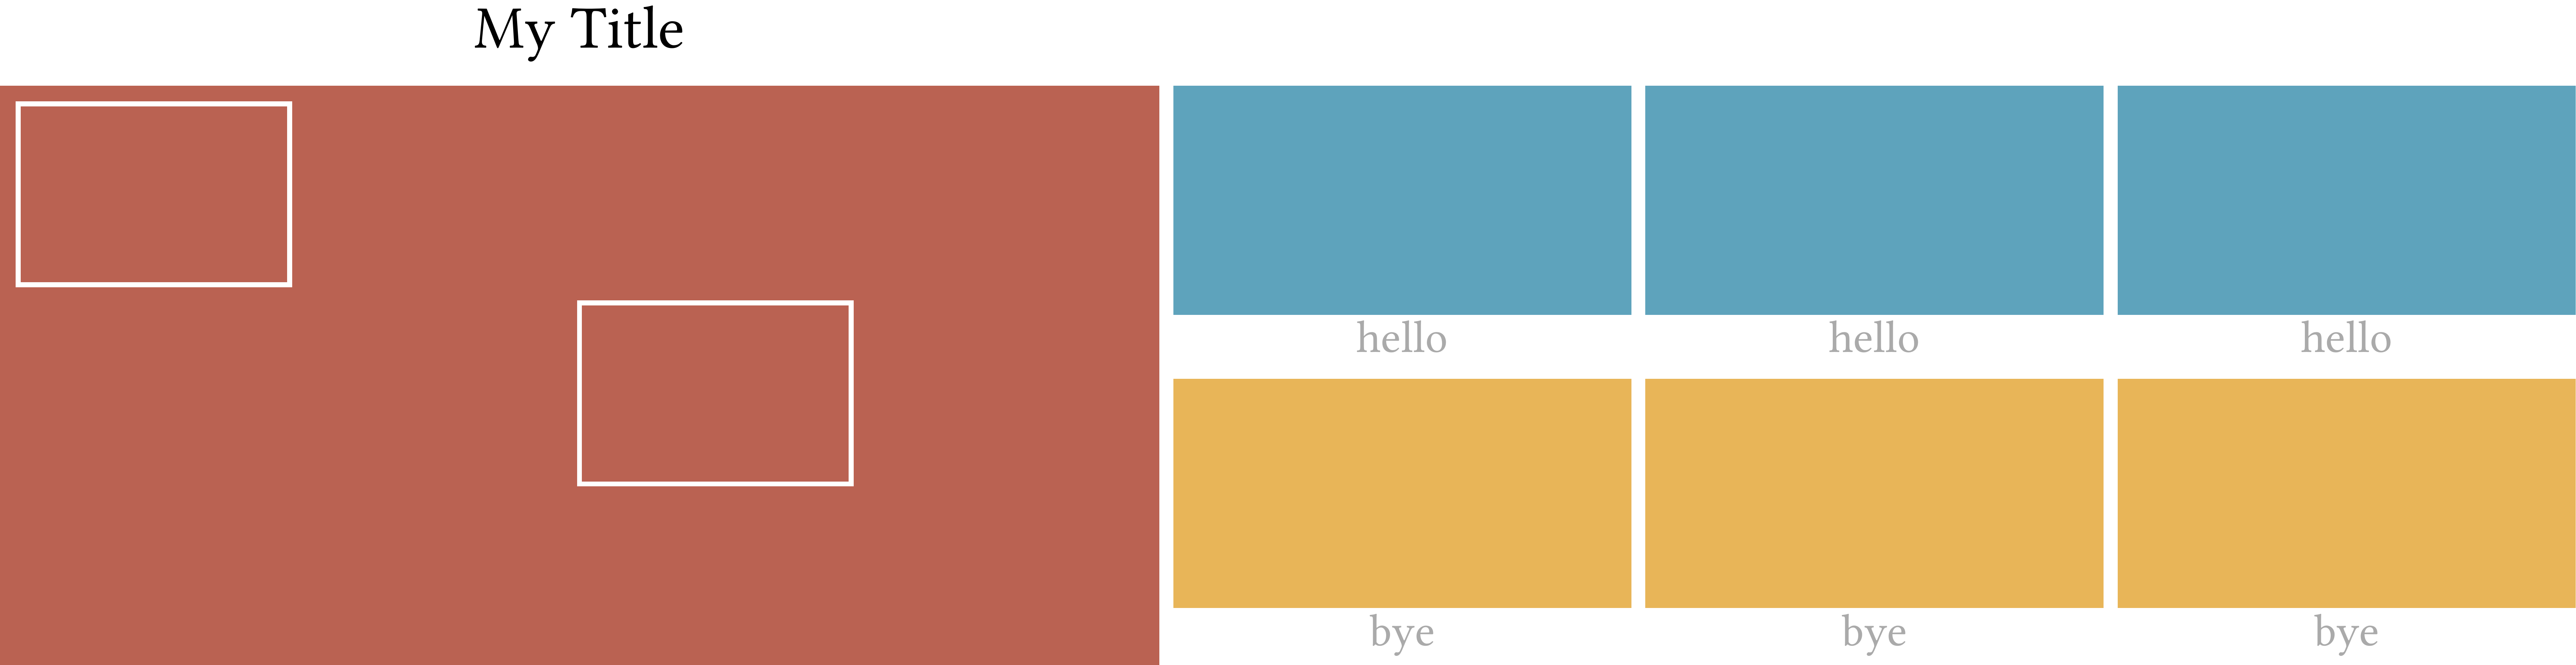

In [11]:
# subtitles/captions for each element
for row in range(n_rows):
    for col in range(n_cols):
        if (row % 2) == 0: 
            c_grid.get_element(row, col).set_caption('hello')
        else:
            c_grid.get_element(row, col).set_caption('bye')

c_lay.set_caption(height_mm=4.0, fontsize=9, txt_color=[170,170,170])

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

Labels can be placed on top of images. Each image has 6 label positions: "top_left", "top_center", "top_right", "bottom_left", etc. 

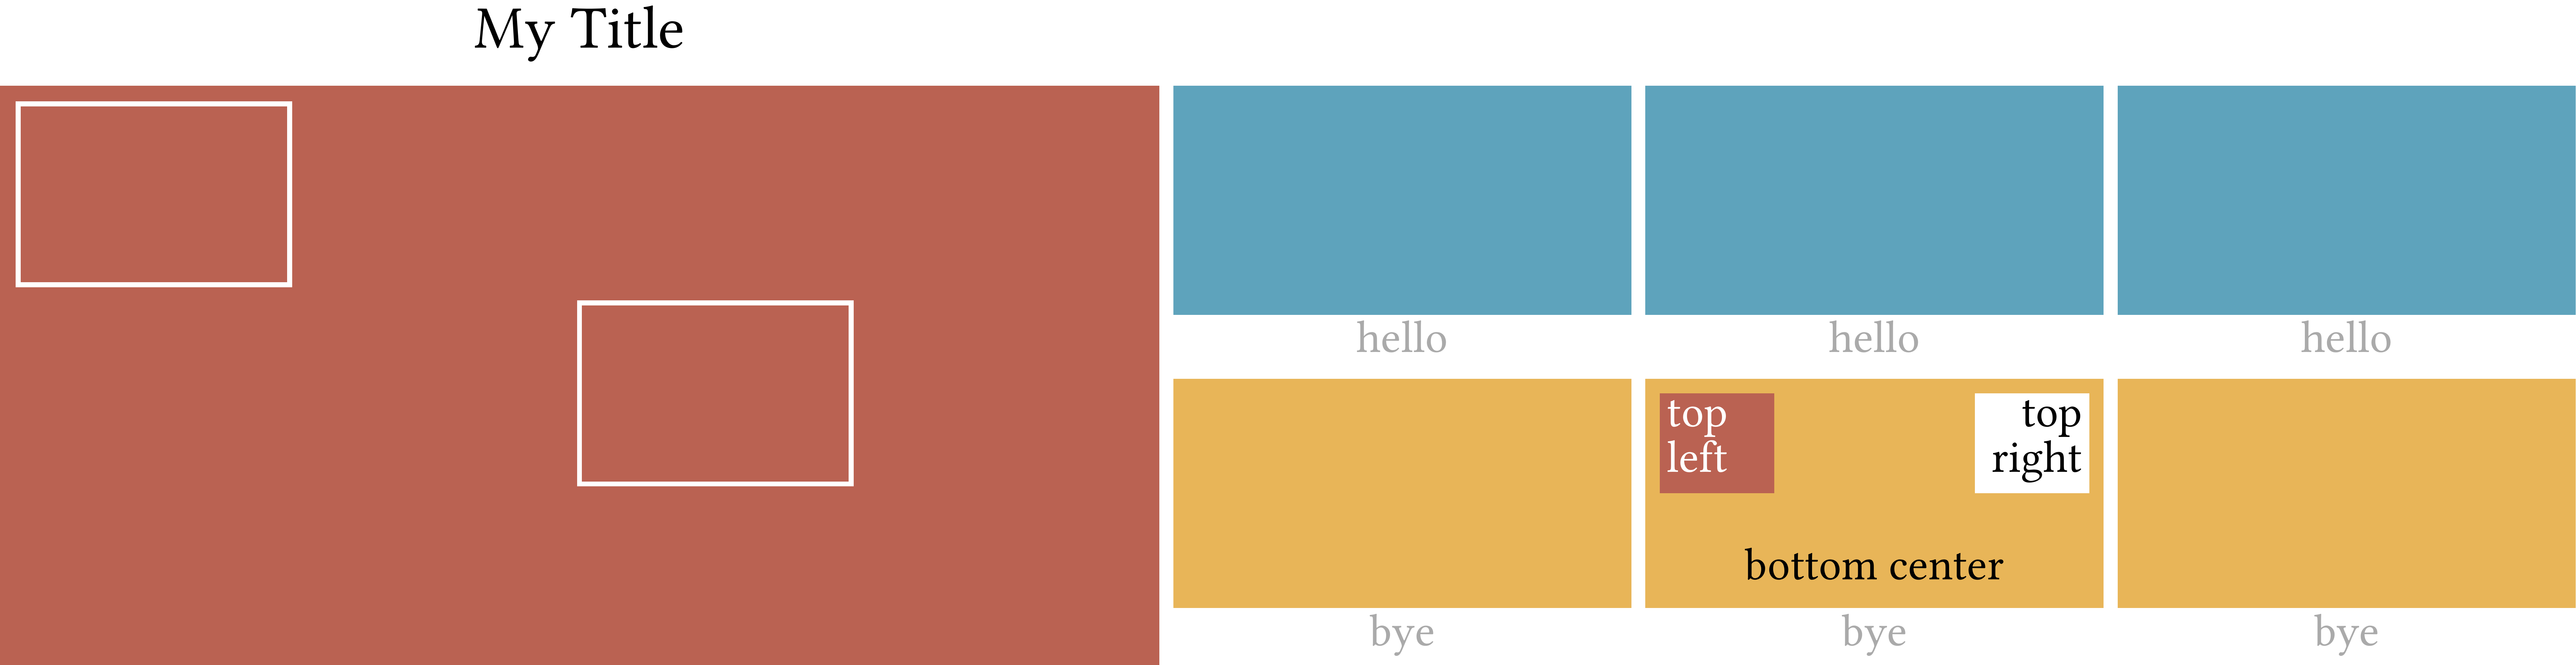

In [12]:
# labels (examples, each element can have in total 6 labels on each valid position)
e1 = c_grid.get_element(1,1)
e1.set_label("bottom center", pos='bottom_center', width_mm=25., height_mm=4.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=None)
e1.set_label("top\\\\right", pos='top_right', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=[255,255,255])
e1.set_label(r"top\\left", pos='top_left', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=orange, txt_color=[255,255,255])

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

Like module titles we can define row or column titles, by providing a list of strings.

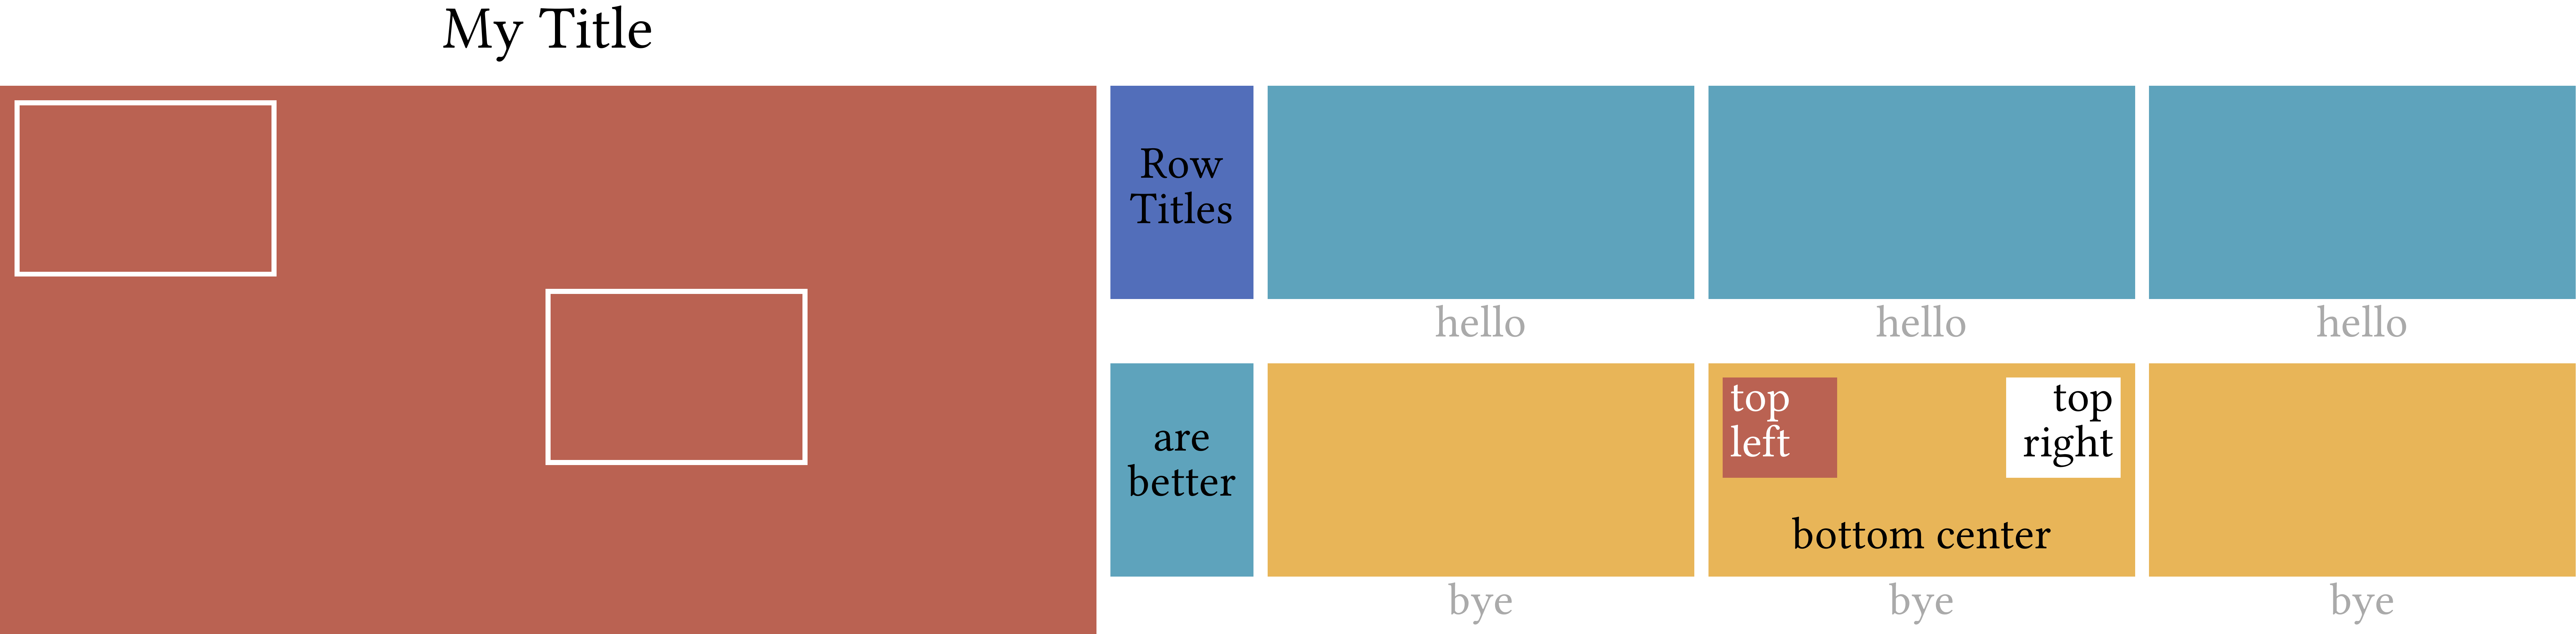

In [13]:
c_grid.set_row_titles('left', ['Row Titles', 'are better'])
c_lay.set_row_titles('left', field_size_mm=10., offset_mm=1., fontsize=9, txt_rotation=0, bg_color=[blue, l_blue])

# create figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='horizontal_figure.pdf')
# show pdf
displaypdf("horizontal_figure.pdf")

Now, we will show you how you can put modules on top of each other (vertical stack).


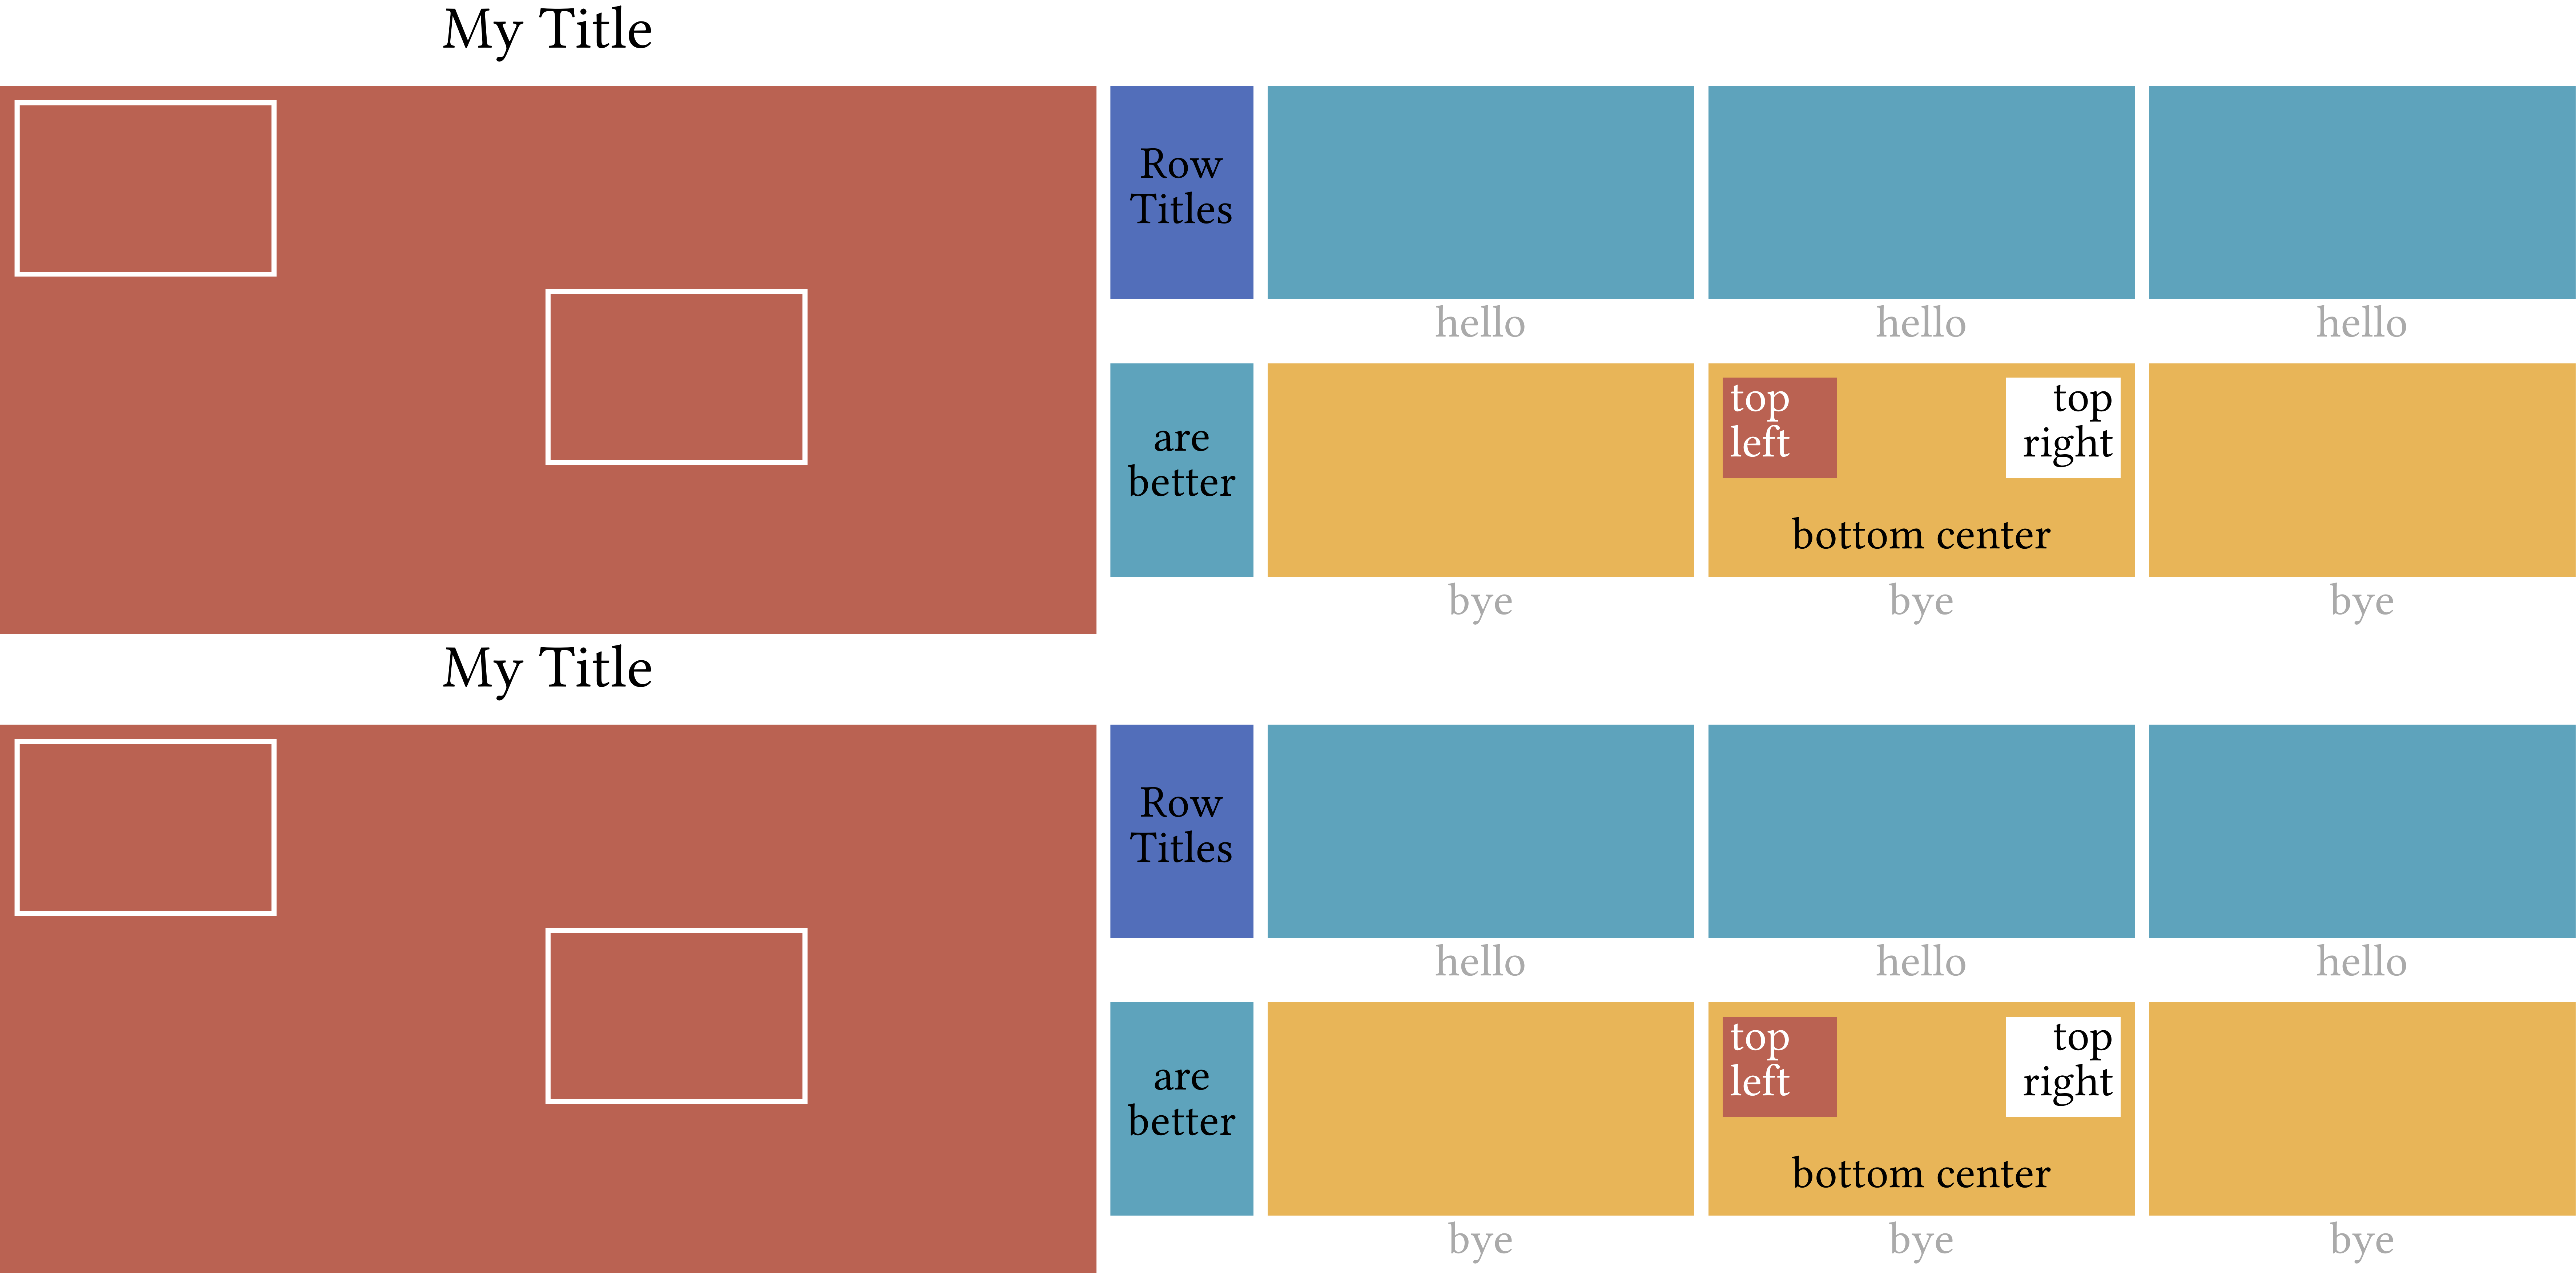

In [14]:
v_stacked = [
    [ref_grid, c_grid],
    [ref_grid, c_grid]
]

# create figure 
figuregen.figure(v_stacked, width_cm=18., filename='figure.pdf')
# show pdf
displaypdf("figure.pdf")

Here is another example how to use vertical stacked figures with new grids and a completely different layout.

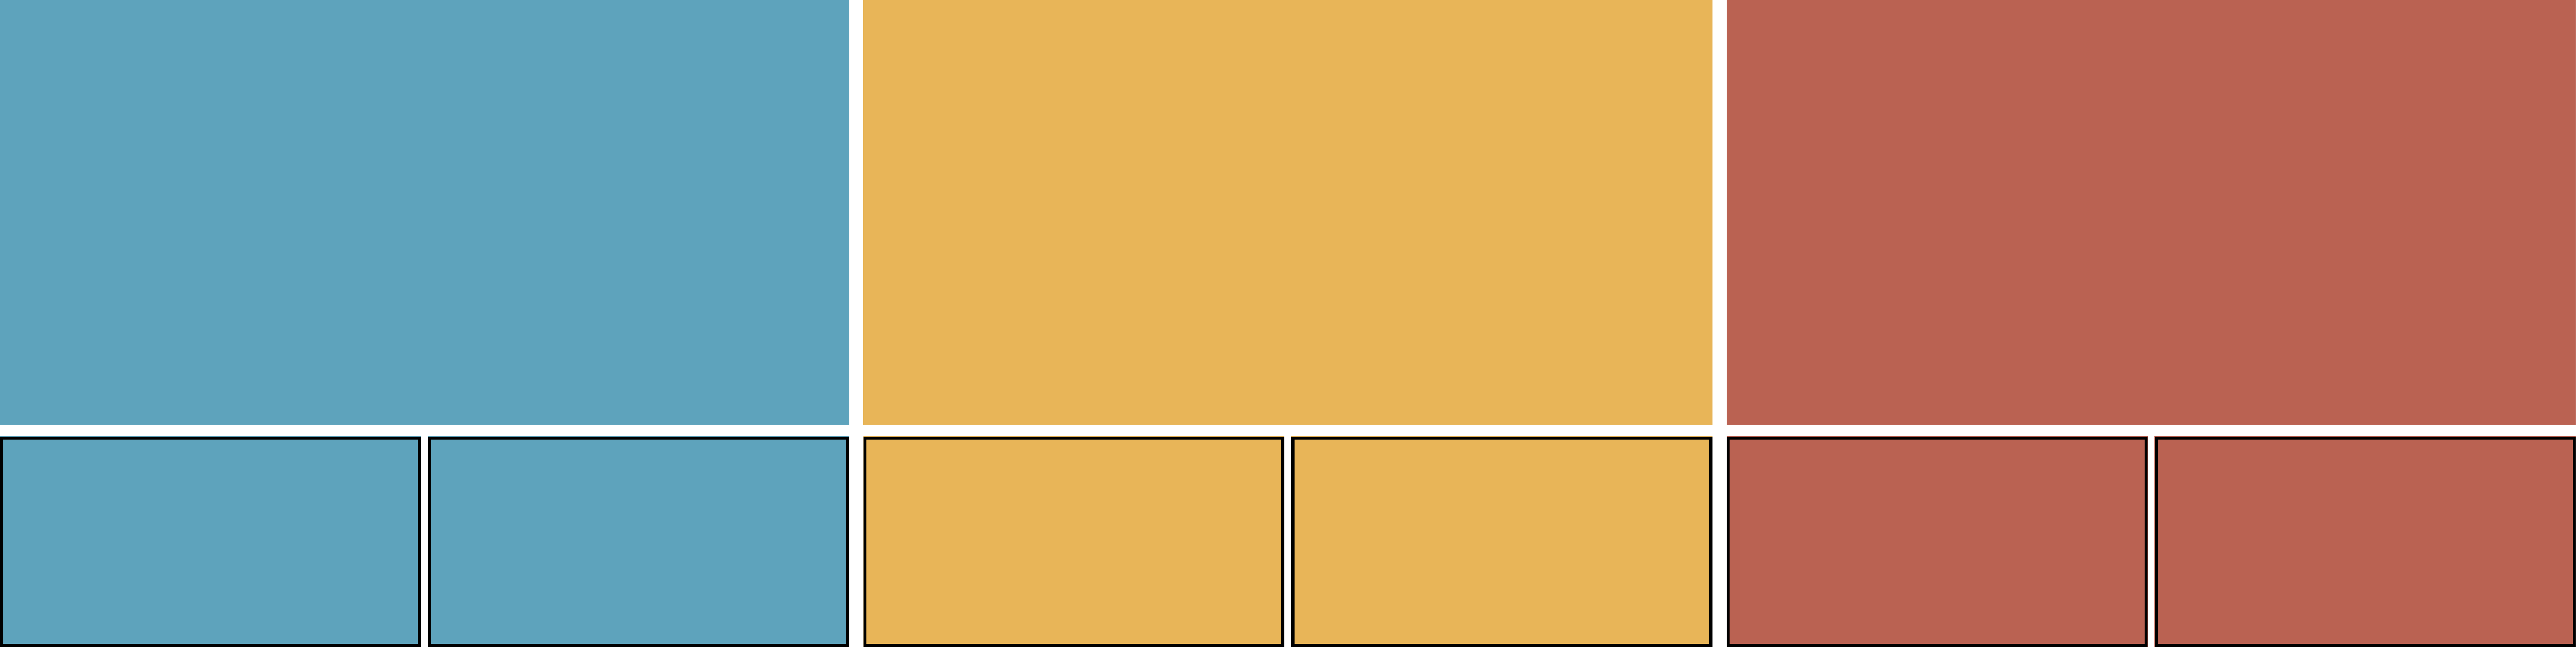

In [17]:
n_rows = 1
# ---------- Horizontal Figure TOP ----------
top_cols = 3
top_grid = figuregen.Grid(num_rows=n_rows, num_cols=top_cols)

# fill grid with image data
for row in range(n_rows):
    for col in range(top_cols):
        top_grid.get_element(row,col).set_image(images[col])

# LAYOUT: Specify paddings (unit: mm)
top_lay = top_grid.get_layout()
top_lay.set_padding(column=1.0, bottom=0.5)

# ---------- Horizontal Figure BOTTOM ----------
bottom_cols = 2

bottom_grid1 = figuregen.Grid(num_rows=n_rows, num_cols=bottom_cols)
bottom_grid2 = figuregen.Grid(num_rows=n_rows, num_cols=bottom_cols)
bottom_grid3 = figuregen.Grid(num_rows=n_rows, num_cols=bottom_cols)

bottom_grids = [bottom_grid1, bottom_grid2, bottom_grid3]

# FILL: with images
idx = 0
for sub_fig in bottom_grids:
    for col in range(bottom_cols):
        e = sub_fig.get_element(0,col).set_image(images[idx])
        e.set_frame(linewidth=0.6, color=[0,0,0])
    idx +=1

# LAYOUT: Specify paddings (unit: mm)
for sub_fig in bottom_grids:
    sub_fig.get_layout().set_padding(column=0.5, right=1.0)

bottom_grids[-1].get_layout().set_padding(right=0.0) # remove last padding

# ---------- V-STACK of Horizontal Figures ----------
grids = [
        [top_grid], 
        bottom_grids
        ]

# create figure
figuregen.figure(grids, width_cm=18., filename='figure.pdf')
# show pdf
displaypdf("figure.pdf")